# Import Libraries

In [1]:
import os
import cv2
import numpy as np
from glob import glob
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
!pip install segmentation-models-pytorch
import segmentation_models_pytorch as smp
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, cohen_kappa_score, confusion_matrix, accuracy_score
import time
inicio = time.time()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 930.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 79.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 1.3 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=dfc311f50a8a16e8aa8114d57beba2d4ee711f8e05e927e5686743e96daace08
  Stored in directory: /root/.cache/pip/wheels/8b/6f/9b/231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=8b9e7e4e2f0b05e69f41c6f372b5ebe11b94868f13b9d1442fdf562a92e5043e
  Stored in directory: /root/.cache/pip/wheels/5f/5b/96/fd94bc35962d7c6b699e8814db545155ac91d2b95785e1b035
Successfully built efficientnet-pytor

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys

FOLDER = '/content/drive/My Drive/DATA_LINDEROS/'
sys.path.append(FOLDER)


Mounted at /content/drive


# Preprocessing

In [3]:
IMAGE_PATH = '/content/drive/MyDrive/DATA_LINDEROS/DATASET_Tabio/Ortofoto_512x512/'
MASK_PATH = '/content/drive/MyDrive/DATA_LINDEROS/DATASET_Tabio/Linderos_512x512/'
batch_size = 16

#!ls '/content/drive/My Drive/DATA_LINDEROS/LINDEROS/'
import os
contenido = os.listdir('/content/drive/MyDrive/DATA_LINDEROS/DATASET_Tabio/Linderos_512x512/')
print(len(contenido))

#!ls '/content/drive/My Drive/DATA_LINDEROS/ORTOFOTO/'
contenido = os.listdir('/content/drive/MyDrive/DATA_LINDEROS/DATASET_Tabio/Ortofoto_512x512/')
print(len(contenido))

# Define lists of image numbers for training and validation
#train_image_numbers = ['10010','10011','10014','10015','10016','10017','10018','10019','10020','10021','10022','10023','10024','10025','10026','10027','10028','10029','10030','10031','10032','10033','10034','10035','10036','10037','10038','10039','10040','10041','10042','10043','10044','10045','10046','10047','10048','10049','10050','10051','10052','10053','10054','10055','10056','10057','10058','10059','10060','10061','10062','10063','10064','10065','10066','10067','10068','10079','10080','10081','10082','10083','10085','10086','10087','10088','10089','10090','10091','10092','10093','10094','10095','10096','10097','10098','10099','10100','10101','10102','10105','10106','10107','10108','10109','10141','10142','10143','10144','12010','12011','12012','12013','12014','12015','12016','12017','12018','12019','1202','12020','12021','12022','12023','12024','12025','12026','12027','12028','12029','1203','12030','12031','12032','12033','12034','12035','12036','12037','12038','12039','12040','12041','12042','12043','12044','12045','12046','12047','12048','12049','1205','12051','12052','12053','12057','12058','1206','1209','12096','12097','12098','12099','1210','12100','12101','12102','12103','12104','12105','12106','12107','15626','15627','15628','15629','15630','15631','15632','15633','15634','15635','15636','15637','15638','15640','15641','15642','15643','15644','15645','15646','15647','15648','15651','15653','15654','15655','15656','15657','15658','15662','15663','15664','15667','15668','15669','15670','15671','15672','15673','15674','15675','15676','16479','16480','16481','16482','16483','16484','16486','16487','165','16529','16530','16531','16533','16534','16535','16536','16538','16539','16540','16541','16542','16543','16545','16546','16547','16548','16549','16550','16551','16552','16555','16556','16557','16558','16559','16560','16561','16562','16563','16564','16566','16567','16568','16569','16570','16572','16573','16577','16578','16579','16580','16581','16582','16583','16585','16586','16588','16589','16590','16591','16592','16593','16594','16595','17910','17911','17912','17913','17914','17915','17916','17917','17918','17919','17920','17921','17922','17923','17924','17925','17926','17927','17928','17930','17982','17983','17984','17985','17986','17987','17988','17989','17990','17991','17992','17993','17994','17995','17996','17997','17998','18000','18001','18002','18009','18010','18012','18022','18023','18024','18025','18026','18027','18028','18029','18030','18031','18032','18033','18034','18035','18036','18037','18038','18039','18040','18041','18042','18043','18044','18045','18046','18047','18048','18049','18050','18051','18052','18053','18054','18055','18056','18057','18058','18060','18061','18115','18116','1992','1993','1994','1995','1996','19962','19963','19965','19967','19968','19969','1997','19970','19974','19975','19976','19977','19978','19979','1998','19980','19981','19982','19983','19984','19985','19986','19987','19988','19989','1999','19990','19991','19992','19993','19994','19995','19996','19997','19998','19999','2000','20000','20001','20002','20003','2001','2002','20092','20093','20094','20095','20096','20098','20099','20100','20104','20105','20106','20107','20108','20109','20110','20111','20112','20113','20114','20115','20116','20117','20118','20119','20120','20121','20122','20123','20124','20125','20126','20127','20128','20129','20130','20131','22585','22586','22587','22588','22589','2259','22590','22591','22592','22593','22594','22595','22596','22597','22598','2260','22600','22601','2261','22705','22706','22707','22708','22709','22710','22711','22712','22713','22714','22715','22716','22717','22718','22719','22720','22721','22722','22723','22724','22725','22726','22727','3179','3180','32','3283','3284','3285','3286','3287','3288','3289','3290','3291','3292','3293','3294','3296','3303','3304','3305','3306','3307','3308','3309','3310','3311','3312','3410','3411','3413','3414','3415','3416','3417','3418','3419','3420','3421','3422','3423','3424','3425','3426','3429','3435','3436','3437','3438','3439','3440','3441','3442','3443','35','3539','3540','3541','3542','3543','3545','3546','3547','3548','3549','3550','3551','3552','3553','3554','3555','3556','3557','3558','3559','3565','3567','3568','3569','3570','3571','3572','3573','3574','3575','3576','36','3667','3668','3669','3670','3671','3672','3673','5401','5409','5410','5413','5414','5480','5481','5482','5483','5484','5485','5486','5487','5488','5489','549','5490','5491','5492','5493','5494','5495','5496','5497','5498','5499','550','5500','5501','5502','5503','5504','5505','5506','5507','5508','5509','551','5510','5511','5512','5513','5514','5515','5516','5517','5518','5519','552','5521','5522','5523','5524','5525','5526','5527','5528','5529','553','5530','5531','5532','5539','5540','5541','556','5607','5610','5611','5612','5614','5615','5616','5617','5619','562','5620','5621','5622','5623','5624','5625','5626','5627','5628','5629','563','5630','5631','5632','5633','5634','5635','6780','6781','6782','6783','6784','6785','6787','6788','6789','6790','6791','6792','6793','6794','6795','6796','6797','6798','6799','680','6800','6801','6802','6803','6804','6805','6806','6807','681','6810','6811','6813','6814','6815','6816','6817','6818','6819','682','6820','6821','6822','6823','6824','6825','6826']
#train_image_numbers = ['161','291','292','293','296','297','419','421','422','427','556','686','814','815','816','945','946','1075','1081','1082','1203','1205','1210','1333','1334','1335','1339','1463','1471','1472','1473','1602','1604','1729','1731','1732','1988','1994','1997','2000','2116','2117','2118','2129','2130','2131','2246','2247','2248','2249','2250','2379','2380','2381','2382','2386','2389','2392','2507','2508','2510','2511','2516','2521','2637','2639','2647','2648','2649','2651','2768','2769','2772','2775','2780','2784','2897','2898','2899','2902','2904','2906','2912','2913','2914','2915','3025','3027','3028','3029','3030','3031','3032','3033','3034','3044','3045','3153','3157','3158','3160','3161','3164','3174','3176','3177','3178','3284','3285','3286','3289','3290','3291','3305','3306','3307','3308','3309','3411','3414','3415','3420','3421','3440','3441','3542','3546','3549','3554','3555','3558','3569','3572','3669','3670','3674','3676','3679','3684','3685','3686','3687','3688','3700','3702','3703','3704','3797','3798','3799','3800','3801','3802','3803','3804','3807','3808','3809','3811','3812','3814','3818','3819','3830','3835','3834','3836','3927','3928','3930','3931','3932','3935','3936','3942','3943','3947','3950','3952','3960','3961','3962','3967','4057','4058','4059','4060','4061','4064','4065','4067','4068','4070','4072','4073','4074','4075','4076','4078','4079','4080','4095','4097','4098','4186','4187','4190','4191','4192','4193','4194','4195','4196','4197','4198','4199','4200','4201','4204','4205','4206','4207','4208','4209','4210','4227','4230','4231','4236','4318','4319','4322','4323','4324','4325','4327','4328','4329','4330','4332','4339','4340','4342','4356','4357','4358','4359','4360','4363','4445','4446','4447','4448','4449','4450','4451','4452','4453','4454','4456','4457','4458','4459','4460','4461','4462','4463','4464','4465','4466','4467','4468','4469','4470','4471','4472','4486','4487','4491','4495','4574','4575','4576','4577','4580','4581','4582','4585','4587','4589','4591','4592','4593','4595','4596','4598','4599','4601','4618','4620','4622','4625','4627','4704','4705','4706','4708','4716','4717','4719','4720','4721','4722','4723','4724','4725','4726','4727','4728','4729','4730','4731','4748','4749','4750','4755','4756','4758','4833','4835','4836','4837','4838','4839','4840','4843','4844','4845','4846','4847','4848','4849','4850','4853','4854','4855','4856','4857','4859','4861','4862','4863','4864','4866','4878','4879','4883','4887','4960','4966','4967','4969','4970','4971','4972','4973','4974','4975','4976','4977','4978','4979','4980','4982','4983','4984','4985','4986','4987','4988','4989','4990','4991','4993','4996','5011','5012','5021','5095','5096','5097','5098','5099','5100','5101','5102','5103','5104','5105','5106','5107','5108','5109','5110','5111','5114','5115','5117','5118','5119','5120','5121','5122','5124','5126','5127','5138','5139','5140','5141','5142','5143','5145','5150','5221','5226','5227','5228','5229','5230','5232','5234','5235','5236','5237','5240','5241','5243','5246','5248','5249','5250','5253','5254','5255','5256','5257','5258','5264','5265','5266','5267','5280','5350','5351','5352','5355','5356','5357','5358','5359','5360','5361','5362','5363','5364','5366','5368','5369','5370','5371','5372','5378','5379','5380','5382','5383','5384','5385','5386','5387','5389','5394','5395','5396','5409','5480','5483','5484','5485','5487','5488','5489','5490','5491','5492','5493','5494','5495','5496','5497','5498','5499','5501','5502','5503','5504','5505','5506','5508','5509','5511','5512','5513','5514','5516','5518','5523','5524','5526','5528','5539','5540','5612','5614','5615','5616','5619','5621','5622','5623','5624','5625','5626','5627','5634','5636','5637','5638','5638','5639','5640','5641','5642','5644','5645','5646','5647','5650','5651','5654','5656','5661','5662','5669','5737','5738','5740','5741','5742','5743','5744','5745','5748','5749','5750','5751','5753','5754','5755','5756','5757','5758','5759','5760','5761','5762','5763','5764','5765','5766','5767','5769','5770','5771','5774','5775','5776','5778','5779','5781','5783','5784','5785','5786','5787','5788','5789','5790','5791','5799','5801','5865','5866','5867','5868','5869','5870','5871','5872','5873','5874','5876','5877','5878','10704','10707','19710','19711','19717','19719','19720','19721','19722','19723','19724','19726','19727','19729','19730','19731','19732','19733','19736','19737','19740','19745','19746','19835','19838','19839','19840','19841','19846','19847','19850','19853','19854','19855','19856','19859','19860','19862','19863','19866','19867','19870','19871','19965','19967','19968','19974','19975','19976','19977','19978','19980','19981','19983','19984','19987','19993','19994','19995','19996','20000','20002','20094','20095','20099','20104','20107','20108','20110','20111','20114','20118','20120','20121','20122','20123','20127','20130','20132','20133','20134','20223','20224','20227']
#val_image_numbers = ['7550','7551','7552','7553','7554','7555','7556','7557','7558','7559','7560','7561','7562','7563','7564','7565','7566','7567','7568','7569','7570','7571','7572','7573','7574','7575','7576','7577','7578','7579','7580','7581','7582','7583','7584','7585','7586','7587','7588','7589','7590','7591','7592','7593','7594','7595','7596','7597','7598','7599','7600','7601','7602','7603','7604','7605','7606','7607','7608','7609','7610','7611','7612','7613','7614','7615','7616','7617','7618','8535','8536','8537','8538','8539','8540','8541','8545','8585','8586','8587','8588','8589','8591','8592','8593','8594','8595','8597','8598','8599','8600','8601','8603','8604','8605','8606','8607','8608','8609','8610','8611','8612','8613','8614','8615','8616','8617','8618','8619','8620','8621','8622','8623','8624','8625','9008','9009','9010','9011','9012','9013','9014','9015','9016','9017','9018','9019','9020','9021','9022','9023','9024','9025','9026','9027','9028','9029','9030','9031','9032','9033','9034','9035','9036','9037','9038','9039','9040','9041','9042','9043','9044','9045','9046','9047','9048','9049','9050','9051','9052','9053','9054','9055','9056','9057','9058','9059','9060','9061','9062','9063','9064','9066','9067','9068','9069','9070','9104','9105','9106','9108','9110','9112','9113','9114','9115','9116','9117','9120','9121','9122','9125','9126','9127','9128','9129','9130','9131','9132','9133','9134','9135','9136','9137','9138','9139','9140','9141','9142','9143','9144','9145','9146','9147','9148','9149','9150','9151','9152','9153','9154','9155','9156','9157','9158','9159','9160','9161','9162','9163']

#train_image_numbers = ['10010', '10011', '10014', '10015', '10016', '10017', '10018', '10019', '10020', '10021', '10022', '10023', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10031', '10032', '10033', '10034', '10035', '10036', '10037', '10038', '10039', '10040', '10041', '10042', '10043', '10044', '10045', '10046', '10047', '10048', '10049', '10050', '10051', '10052', '10053', '10054', '10055', '10056', '10057', '10058', '10059', '10060', '10061', '10062', '10063', '10064', '10065', '10066', '10067', '10068', '10079', '10080', '10081', '10082', '10083', '10085', '10086', '10087', '10088', '10089', '10090', '10091', '10092', '10093', '10094', '10095', '10096', '10097', '10098', '10099', '10100', '10101', '10102', '10105', '10106', '10107', '10108', '10109', '10141', '10142', '10143', '10144', '10145', '10146', '10147', '10148', '10149', '10150', '10151', '10152', '10153', '10154', '10155', '10156', '10157', '10158', '10159', '10160', '10161', '10162', '10163', '10164', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10173', '10174', '10175', '10176', '10177', '10178', '10179', '10180', '10181', '10182', '10183', '10184', '10185', '10186', '10187', '10188', '10189', '10190', '10191', '10192', '10193', '10194', '10195', '10196', '10197', '10198', '10199', '10200', '10201', '10202', '10203', '10204', '10205', '10207', '10208', '10209', '10210', '10211', '10212', '10213', '10214', '10215', '10216', '10218', '10219', '10220', '10221', '10222', '10223', '10224', '10225', '10226', '10227', '10228', '10229', '10230', '10231', '10232', '10235', '10236', '10237', '10238', '10239', '10272', '10273', '10274', '10275', '10276', '10277', '10278', '10279', '10280', '10281', '10282', '10283', '10284', '10285', '10286', '10287', '10288', '10289', '10290', '10291', '10292', '10293', '10294', '10295', '10296', '10297', '10298', '10299', '10300', '10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '10309', '10310', '10311', '10312', '10313', '10314', '10315', '10316', '10317', '10318', '10319', '10320', '10321', '10322', '10323', '10324', '10325', '10327', '10328', '10329', '10330', '10331', '10332', '10333', '10334', '10338', '10339', '10340', '10341', '10342', '10343', '10344', '10345', '10346', '10347', '10348', '10349', '10350', '10351', '10352', '10353', '10354', '10355', '10356', '10357', '10358', '10359', '10360', '10361', '10362', '10363', '10365', '10366', '10367', '10368', '10403', '10404', '10405', '10406', '10407', '10408', '10409', '10410', '10411', '10412', '10413', '10414', '10415', '10416', '10417', '10418', '10419', '10420', '10421', '10423', '10424', '10425', '10426', '10427', '10428', '10429', '10430', '10431', '10432', '10433', '10434', '10435', '10436', '10437', '10438', '10439', '10440', '10441', '10442', '10443', '10444', '10445', '10446', '10447', '10448', '10449', '10450', '10451', '10452', '10453', '10454', '10455', '10457', '10458', '10459', '10460', '10461', '10463', '10464', '10467', '10468', '10469', '10470', '10471', '10472', '10473', '10474', '10475', '10476', '10479', '10480', '10481', '10482', '10483', '10484', '10485', '10486', '10487', '10488', '10489', '10490', '10491', '10492', '10493', '10494', '10497', '10498', '10499', '10533', '10534', '10535', '10536', '10537', '10538', '10539', '10540', '10541', '10542', '10543', '10544', '10545', '10546', '10547', '10548', '10549', '10550', '10551', '10552', '10553', '10554', '10555', '10556', '10557', '10558', '10559', '10560', '10561', '10562', '10563', '10564', '10565', '10566', '10567', '10568', '10569', '10570', '10571', '10572', '10573', '10574', '10575', '10576', '10577', '10578', '10579', '10580', '10581', '10582', '10583', '10584', '10585', '10586', '10587', '10588', '10589', '10590', '10591', '10592', '10593', '10594', '10595', '10596', '10597', '10598', '10599', '10600', '10601', '10602', '10603', '10604', '10605', '10606', '10607', '10608', '10609', '10610', '10611', '10612', '10613', '10614', '10615', '10616', '10617', '10618', '10619', '10620', '10621', '10622', '10623', '10624', '10628', '10629', '10663', '10664', '10665', '10666', '10667', '10668', '10669', '10670', '10671', '10672', '10673', '10674', '10676', '10679', '10680', '10681', '10682', '10683', '10684', '10685', '10686', '10687', '10688', '10689', '10690', '10691', '10692', '10693', '10694', '10695', '10696', '10697', '10698', '10699', '10700', '10701', '10702', '10703', '10704', '10705', '10706', '10707', '10708', '10709', '10710', '10711', '10712', '10713', '10714', '10715', '10717', '10718', '10719', '1072', '10720', '10721', '10722', '10723', '10724', '10725', '10726', '10727', '10728', '10729', '1073', '10730', '10731', '10732', '10733', '10734', '10735', '10736', '10737', '10738', '10739', '10741', '10742', '10743', '10744', '10745', '10746', '10747', '10748', '10749', '1075', '10750', '10751', '10752', '10754', '10755', '10757', '10758', '10759', '1076', '10795', '10796', '10798', '10799', '1080', '10800', '10801', '10802', '10803', '10805', '10806', '10807', '10808', '10809', '1081', '10810', '10811', '10812', '10813', '10814', '10816', '10817', '10818', '10819', '1082', '10820', '10821', '10822', '10823', '10824', '10825', '10826', '10827', '10828', '10829', '1083', '10830', '10831', '10832', '10833', '10834', '10835', '10836', '10837', '10838', '10839', '10840', '10841', '10842', '10843', '10844', '10845', '10846', '10848', '10849', '10850', '10851', '10854', '10855', '10856', '10857', '10858', '10859', '10860', '10861', '10862', '10863', '10864', '10865', '10866', '10867', '10868', '10871', '10872', '10873', '10874', '10876', '10877', '10878', '10879', '10880', '10881', '10882', '10883', '10884', '10885', '10886', '10888', '10924', '10925', '10929', '10930', '10931', '10932', '10933', '10934', '10935', '10936', '10937', '10938', '10939', '10940', '10941', '10942', '10943', '10944', '10945', '10946', '10948', '10949', '10950', '10951', '10952', '10953', '10954', '10955', '10956', '10957', '10958', '10959', '10960', '10961', '10962', '10963', '10964', '10965', '10966', '10967', '10968', '10969', '10970', '10971', '10972', '10973', '10974', '10975', '10976', '10977', '10978', '10979', '10981', '10982', '10985', '10986', '10987', '10988', '10989', '10990', '10992', '10993', '10994', '10995', '10996', '10998', '10999', '11000', '11001', '11002', '11003', '11004', '11005', '11006', '11007', '11008', '11009', '11010', '11011', '11012', '11013', '11014', '11015', '11016', '11017', '11018', '11059', '11060', '11061', '11063', '11064', '11065', '11066', '11067', '11068', '11069', '11070', '11071', '11072', '11073', '11074', '11075', '11076', '11077', '11078', '11079', '11080', '11081', '11082', '11084', '11085', '11086', '11087', '11088', '11089', '11090', '11091', '11092', '11093', '11094', '11095', '11096', '11097', '11098', '11099', '11100', '11101', '11102', '11103', '11104', '11105', '11106', '11107', '11108', '11109', '11110', '11112', '11113', '11115', '11116', '11117', '11118', '11119', '11121', '11122', '11123', '11124', '11125', '11126', '11127', '11128', '11129', '11130', '11131', '11132', '11133', '11134', '11135', '11136', '11137', '11138', '11139', '11140', '11141', '11146', '11147', '11148', '11151', '11189', '11190', '11191', '11192', '11193', '11194', '11195', '11196', '11197', '11198', '11199', '11200', '11201', '11202', '11203', '11204', '11205', '11206', '11207', '11208', '11209', '11210', '11211', '11212', '11213', '11214', '11215', '11216', '11217', '11218', '11219', '11220', '11221', '11222', '11223', '11224', '11225', '11226', '11227', '11228', '11229', '11230', '11231', '11232', '11233', '11234', '11235', '11236', '11237', '11238', '11240', '11243', '11245', '11246', '11247', '11248', '11249', '11250', '11251', '11252', '11253', '11254', '11255', '11256', '11257', '11258', '11259', '11260', '11261', '11262', '11263', '11264', '11265', '11266', '11267', '11268', '11269', '11270', '11271', '11272', '11273', '11277', '11278', '11279', '11280', '11281', '11318', '11319', '11321', '11322', '11323', '11324', '11325', '11326', '11327', '11328', '11329', '11330', '11331', '11332', '11333', '11334', '11335', '11336', '11337', '11338', '11339', '11340', '11341', '11343', '11344', '11345', '11346', '11347', '11348', '11349', '11350', '11351', '11352', '11353', '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11361', '11362', '11363', '11364', '11365', '11366', '11367', '11368', '11370', '11371', '11372', '11373', '11374', '11375', '11376', '11378', '11379', '11380', '11381', '11382', '11383', '11384', '11385', '11386', '11387', '11389', '11390', '11391', '11392', '11393', '11394', '11395', '11396', '11397', '11398', '11399', '11400', '11401', '11408', '11449', '11450', '11451', '11462', '11463', '11464', '11465', '11466', '11467', '11468', '11469', '11470', '11471', '11472', '11473', '11474', '11475', '11476', '11477', '11478', '11479', '11480', '11481', '11482', '11483', '11484', '11485', '11486', '11487', '11488', '11489', '11490', '11491', '11492', '11493', '11494', '11495', '11496', '11497', '11498', '11499', '11501', '11502', '11503', '11504', '11506', '11507', '11508', '11509', '11510', '11511', '11512', '11513', '11514', '11515', '11516', '11517', '11518', '11519', '11520', '11521', '11522', '11523', '11524', '11525', '11526', '11527', '11528', '11529', '11530', '11531', '11584', '11585', '11586', '11587', '11588', '11589', '11590', '11591', '11592', '11593', '11594', '11595', '11596', '11597', '11598', '11599', '11600', '11601', '11602', '11603', '11604', '11605', '11606', '11607', '11608', '11609', '11610', '11612', '11613', '11614', '11615', '11616', '11617', '11618', '11619', '11620', '11621', '11622', '11623', '11624', '11625', '11626', '11627', '11628', '11629', '11630', '11631', '11633', '11634', '11635', '11636', '11637', '11638', '11639', '11640', '11641', '11642', '11643', '11647', '11648', '11650', '11651', '11652', '11653', '11654', '11655', '11656', '11657', '11658',  '11659', '11660', '11661', '11662', '11663', '11709', '11710', '11712', '11713', '11714', '11715', '11718', '11719', '11720', '11721', '11722', '11723', '11724', '11725', '11726', '11727', '11728', '11729', '11730', '11731', '11732', '11733', '11734', '11735', '11736', '11737', '11738', '11739', '11740', '11741', '11742', '11743', '11744', '11745', '11746', '11747', '11748', '11749', '11750', '11751', '11752', '11753', '11754', '11755', '11756', '11757', '11758', '11759', '11760', '11761', '11762', '11764', '11765', '11766', '11767', '11768', '11769', '11770', '11771', '11773', '11774', '11775', '11776', '11777', '11778', '11779', '11780', '11781', '11782', '11783', '11784', '11785', '11786', '11787', '11788', '11789', '11790', '11791', '11792', '11793', '11838', '11839', '11840', '11841', '11842', '11843', '11844', '11845', '11847', '11848', '11849', '11850', '11851', '11852', '11853', '11854', '11855', '11856', '11857', '11858', '11859', '11860', '11861', '11862', '11863', '11865', '11866', '11867', '11868', '11869', '11870', '11871', '11872', '11873', '11874', '11875', '11876', '11877', '11878', '11879', '11880', '11883', '11884', '11885', '11886', '11887', '11888', '11889', '11890', '11891', '11892', '11893', '11894', '11895', '11896', '11897', '11898', '11899', '11900', '11901', '11902', '11903', '11904', '11905', '11906', '11907', '11908', '11909', '11910', '11911', '11912', '11913', '11914', '11915', '11916', '11917', '11918', '11919', '11920', '11921', '11922', '11923', '11927', '11928', '11967', '11968', '11969', '11970', '11971', '11972', '11973', '11974', '11975', '11976', '11977', '11978', '11979', '11980', '11981', '11982', '11983', '11984', '11985', '11986', '11987', '11988', '11989', '11990', '11991', '11992', '11993', '11994', '11995', '11996', '11997', '11998', '11999', '12000', '12001', '12002', '12003', '12004', '12005', '12006', '12007', '12008', '12009', '12010', '12011', '12012', '12013', '12014', '12015', '12016', '12017', '12018', '12019', '1202', '12020', '12021', '12022', '12023', '12024', '12025', '12026', '12027', '12028', '12029', '1203', '12030', '12031', '12032', '12033', '12034', '12035', '12036', '12037', '12038', '12039', '12040', '12041', '12042', '12043', '12044', '12045', '12046', '12047', '12048', '12049', '1205', '12051', '12052', '12053', '12057', '12058', '1206', '1209', '12096', '12097', '12098', '12099', '1210', '12100', '12101', '12102', '12103', '12104', '12105', '12106', '12107', '12108', '12109', '12110', '12111', '12112', '12113', '12114', '12115', '12116', '12117', '12118', '12119', '1212', '12120', '12121', '12122', '12123', '12124', '12125', '12126', '12127', '12128', '12129', '1213', '12130', '12131', '12132', '12133', '12134', '12135', '12136', '12137', '12138', '12139', '12140', '12141', '12142', '12143', '12144', '12145', '12146', '12147', '12148', '12149', '12150', '12151', '12152', '12153', '12154', '12155', '12156', '12157', '12158', '12159', '12160', '12161', '12162', '12163', '12164', '12165', '12167', '12168', '12169', '12170', '12171', '12172', '12173', '12174', '12175', '12176', '12177', '12178', '12179', '12180', '12182', '12183', '12187', '12188', '12189', '12192', '12225', '12226', '12228', '12229', '12230', '12231', '12232', '12233', '12234', '12235', '12236', '12237', '12238', '12239', '12240', '12241', '12242', '12243', '12244', '12245', '12246', '12247', '12248', '12249', '12250', '12251', '12252', '12253', '12254', '12255', '12256', '12257', '12258', '12259', '12260', '12261', '12262', '12263', '12264', '12265', '12266', '12267', '12268', '12269', '12270', '12271', '12272', '12273', '12274', '12275', '12276', '12277', '12278', '12279', '12280', '12281', '12282', '12283', '12284', '12285', '12286', '12287', '12288', '12291', '12292', '12293', '12294', '12295', '12296', '12298', '12300', '12301', '12302', '12303', '12304', '12305', '12306', '12307', '12308', '12309', '12310', '12311', '12312', '12313', '12317', '12318', '12319', '12320', '12321', '12322', '12356', '12357', '12359', '12360', '12361', '12362', '12363', '12364', '12365', '12366', '12367', '12368', '12369', '12370', '12371', '12372', '12373', '12374', '12375', '12376', '12377', '12378', '12380', '12381', '12382', '12383', '12384', '12385', '12386', '12387', '12388', '12389', '12390', '12391', '12392', '12393', '12394', '12396', '12397', '12398', '12399', '12400', '12401', '12402', '12403', '12404', '12405', '12406', '12407', '12408', '12409', '12410', '12411', '12412', '12413', '12414', '12415', '12416', '12417', '12418', '12419', '12420', '12421', '12422', '12423', '12424', '12425', '12426', '12427', '12428', '12429', '12430', '12431', '12432', '12433', '12434', '12435', '12436', '12437', '12438', '12439', '12440', '12441', '12442', '12443', '12446', '12447', '12448', '12449', '12450', '12451', '12485', '12486', '12487', '12488', '12489', '12490', '12491', '12492', '12493', '12494', '12495', '12496', '12497', '12498', '12499', '12500', '12501', '12502', '12503', '12504', '12505', '12506', '12507', '12508', '12509', '12510', '12511', '12512', '12513', '12514', '12515', '12516', '12517', '12518', '12519', '12520', '12521', '12522', '12523', '12524', '12525', '12526', '12527', '12528', '12529', '12530', '12531', '12532', '12533', '12534', '12535', '12536', '12537', '12538', '12539', '12540', '12541', '12542', '12543', '12544', '12545', '12546', '12547', '12548', '12549', '12550', '12551', '12552', '12553', '12554', '12555', '12556', '12557', '12558', '12559', '12560', '12561', '12562', '12563', '12564', '12565', '12566', '12567', '12568', '12569', '12570', '12571', '12572', '12573', '12575', '12576', '12577', '12578', '12579', '12580', '12581', '12615', '12616', '12617', '12618', '12619', '12620', '12621', '12622', '12623', '12624', '12625', '12626', '12627', '12628', '12629', '12630', '12631', '12632', '12633', '12634', '12635', '12636', '12637', '12638', '12639', '12640', '12641', '12642', '12643', '12644', '12645', '12646', '12647', '12648', '12649', '12650', '12651', '12652', '12653', '12654', '12655', '12656', '12657', '12658', '12659', '12661', '12662', '12663', '12664', '12665', '12666', '12668', '12669', '12670', '12671', '12672', '12673', '12674', '12675', '12676', '12677', '12678', '12679', '12680', '12681', '12682', '12683', '12685', '12686', '12687', '12688', '12689', '12690', '12691', '12692', '12693', '12694', '12695', '12696', '12697', '12698', '12699', '12700', '12701', '12702', '12703', '12704', '12705', '12707', '12708', '12710', '12711', '12712', '12713', '12744', '12745', '12746', '12747', '12748', '12749', '12750', '12751', '12752', '12753', '12754', '12755', '12756', '12757', '12758', '12759', '12760', '12761', '12763', '12764', '12765', '12766', '12767', '12768', '12769', '12770', '12771', '12772', '12773', '12774', '12775', '12776', '12777', '12778', '12779', '12780', '12781', '12782', '12783', '12784', '12785', '12786', '12787', '12788', '12789', '12790', '12791', '12792', '12793', '12795', '12796', '12797', '12798', '12799', '12800', '12801', '12802', '12803', '12804', '12805', '12806', '12809', '12810', '12811', '12812', '12813', '12814', '12815', '12816', '12817', '12818', '12819', '12820', '12821', '12822', '12823', '12824', '12825', '12827', '12828', '12829', '12830', '12831', '12832', '12833', '12838', '12839', '12840', '12841', '12842', '12843', '12844', '12845', '12873', '12874', '12875', '12876', '12877', '12878', '12879', '12880', '12881', '12882', '12883', '12884', '12885', '12886', '12887', '12888', '12889', '12890', '12891', '12892', '12893', '12894', '12895', '12896', '12897', '12898', '12899', '12900', '12901', '12902', '12903', '12904', '12905', '12906', '12907', '12908', '12909', '12910', '12911', '12912', '12913', '12914', '12915', '12916', '12918', '12920', '12921', '12922', '12925', '12926', '12927', '12928', '12929', '12930', '12931', '12932', '12933', '12934', '12935', '12936', '12938', '12939', '12940', '12941', '12942', '12943', '12944', '12945', '12946', '12947', '12948']

#val_image_numbers = ['12949', '12950', '12951', '12952', '12953','12954', '12955', '12956', '12957', '12958', '12959', '12960', '12961', '12963', '12964', '12968', '12969', '12970', '12972', '12973', '12974', '13003', '13004', '13005', '13006', '13008', '13009', '13010', '13011', '13012', '13013', '13014', '13015', '13016', '13017', '13018', '13019', '13020', '13021', '13022', '13023', '13024', '13025','13026', '13027', '13028', '13029', '13030', '13031', '13032', '13033', '13034', '13035', '13036', '13037', '13038', '13039', '13040', '13041', '13042', '13043', '13044', '13045', '13046', '13048', '13049', '13050', '13051', '13052', '13055', '13056', '13057', '13058', '13059', '13061', '13062', '13063', '13064', '13065', '13066', '13067', '13068', '13069', '13070', '13071', '13072', '13073', '13074', '13075', '13076', '13077', '13078', '13079', '13080', '13082', '13083', '13084', '13085', '13086', '13087', '13088', '13089', '13090', '13091', '13093', '13094', '13097', '13098', '13100', '13103', '13104', '13133', '13134', '13135', '13136', '13138', '13139', '13140', '13141', '13142', '13143', '13144', '13145', '13146', '13147', '13148','13149', '13150', '13151', '13152', '13153', '13154', '13155', '13156', '13157', '13158', '13159', '13160', '13161', '13162', '13163', '13164', '13165', '13166', '13167', '13168', '13169', '13170', '13171', '13172', '13173', '13174', '13176', '13177', '13179', '13180', '13181', '13182', '13185', '13186', '13187', '13188', '13189', '13190', '13191', '13192', '13193', '13194', '13195', '13196', '13197', '13198', '13199', '13200', '13201', '13202', '13203', '13204', '13205', '13206', '13207', '13208', '13209', '13210', '13211', '13212', '13213', '13214', '13215', '13216', '13217', '13218', '13219', '13220', '13221', '13222', '13223', '13224', '13227', '13228', '13229', '13230', '13231', '13232', '13233', '13234', '13263', '13266', '13267', '13268', '13269', '13270', '13271', '13272', '13273', '13274', '13275', '13276', '13277', '13278', '13279', '13280', '13281', '13282', '13283', '13284', '13285', '13286', '13287', '13288', '13289', '13290', '13292', '13293', '13296', '13297', '13298', '13299', '13300', '13301', '13302', '13303', '13304', '13307', '13308', '13309', '13310', '13311', '13312', '13313', '13314', '13315', '13316', '13317', '13318', '13319', '1332', '13320', '13321', '13322', '13323', '13324', '13325', '13326', '13327', '13328', '13329', '1333', '13330', '13331', '13332', '13333', '13334', '13335', '13336', '13337', '13338', '13339', '1334', '13340', '13341', '13342', '13343', '1335', '13356', '13357', '13358', '13359', '13360', '13361', '13362', '13363', '1339', '13396', '13397', '13398', '13399', '13400', '13401', '13402', '13403', '13404', '13405', '13406', '13407', '13408', '13409', '13410', '13411', '13412', '13413', '13414', '13415', '13416', '13417', '13418', '13419', '13420', '13422', '13423', '13424', '13428', '13429', '13430', '13431', '13432', '13437', '13438', '13439', '13440', '13441', '13442', '13443', '13444', '13445', '13446', '13447', '13448', '13449', '13450', '13451', '13452', '13453', '13454', '13455', '13456', '13457', '13458', '13459', '13460', '13461', '13462', '13463', '13464', '13465', '13466', '13468', '13469', '13470', '13471', '13472', '13473', '13474', '13475', '13476', '13477', '13478', '13479', '13480', '13483', '13484', '13488', '13489', '13493', '13494', '13525', '13526', '13527', '13528', '13529', '13530', '13531', '13532', '13533', '13534', '13535', '13536', '13538', '13539', '13540', '13541', '13542', '13543', '13545', '13546', '13547', '13548', '13549', '13550', '13551', '13552', '13553', '13554', '13555', '13556', '13557', '13558', '13559', '13560', '13563', '13567', '13568', '13569', '13570', '13571', '13572', '13573', '13574', '13575', '13576', '13577', '13578', '13579', '13580', '13581', '13582', '13583', '13584', '13585', '13586', '13587', '13588', '13589', '13590', '13591', '13592', '13593', '13594', '13595', '13596', '13597', '13598', '13599', '13600', '13601', '13602', '13603', '13604', '13605', '13606', '13607', '13608', '13609', '13610', '13613', '13614', '13619', '13620', '13623', '13655', '13656', '13658', '13659', '13660', '13661', '13662', '13663', '13664', '13665', '13666', '13667', '13668', '13669', '13670', '13671', '13672', '13673', '13674', '13675', '13676', '13677', '13678', '13679', '13680', '13681', '13682', '13683', '13684', '13685', '13686', '13687', '13688', '13689', '13690', '13691', '13692', '13693', '13694', '13695', '13698']

# Build the full paths using the image numbers
#train_images = [os.path.join(IMAGE_PATH, f'SUBACHOQUE_ORTO_{number}.TIF') for number in train_image_numbers]
#train_mask = [os.path.join(MASK_PATH, f'SUBACHOQUE_LINDEROS_{number}.TIF') for number in train_image_numbers]

#val_images = [os.path.join(IMAGE_PATH, f'SUBACHOQUE_ORTO_{number}.TIF') for number in val_image_numbers]
#val_mask = [os.path.join(MASK_PATH, f'SUBACHOQUE_LINDEROS_{number}.TIF') for number in val_image_numbers]



6012
6012


# Dataset

In [4]:
class SegmentationDataset(Dataset):

  def __init__(self, img_paths:list, mask_paths:list, transform=None):
    self.img_paths = img_paths
    self.mask_paths = mask_paths
    self.transform = transform

  def __len__(self):
    return len(self.img_paths)

  def __getitem__(self, index):
    image = cv2.imread(self.img_paths[index])
    if image is None:
        print(f"Error: Could not read image file: {self.img_paths[index]}")
        return None, None #Return None, None if image could not be read

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype('float32') / 255.0

    mask = cv2.imread(self.mask_paths[index], cv2.IMREAD_GRAYSCALE)
    if mask is None:
        print(f"Error: Could not read mask file: {self.mask_paths[index]}")
        return None, None #Return None, None if mask could not be read

    mask = mask.astype('float32') / 255.0
    mask[mask > 0] = 1  # Asigna 1 a todos los valores mayores que 0 (boundary)
    #mask = np.expand_dims(mask, axis=0)


    image = cv2.resize(image, (160, 160))  # Example: Resize to 512x512
    mask = cv2.resize(mask, (160, 160))

    if image.shape[:2] != mask.shape:
      print(f"Error: Image and mask shapes do not match after resizing: {self.img_paths[index]}, {self.mask_paths[index]}")
      return None, None

    # Store original dimensions before padding
    original_height, original_width = image.shape[:2]

    # Calculate padding, ensuring padding values are non-negative
    h, w = image.shape[:2]
    new_h = (h // 32 + 1) * 32  # Pad height to the nearest multiple of 32
    new_w = (w // 32 + 1) * 32  # Pad width to the nearest multiple of 32

    # Pad the image using OpenCV, using max to ensure padding is non-negative
    image = cv2.copyMakeBorder(image, 0, max(0, new_h - h), 0, max(0, new_w - w), cv2.BORDER_CONSTANT, value=0)
    mask = cv2.copyMakeBorder(mask, 0, max(0, new_h - h), 0, max(0, new_w - w), cv2.BORDER_CONSTANT, value=0) # Pad the mask as well

    # Crop to original size using the stored dimensions
    image = image[:original_height, :original_width]
    mask = mask[:original_height, :original_width]


    image = torch.tensor(image).permute(2,0,1)
    mask = torch.tensor(mask).unsqueeze(0) # Added unsqueeze to create channel dimension

    return image, mask

# Create datasets
#train_dataset = SegmentationDataset(train_images, train_mask)
#val_dataset = SegmentationDataset(val_images, val_mask)

# Create dataloaders
#train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#print(f"Número de imágenes de entrenamiento: {len(train_dataset)}")
#print(f"Número de imágenes de validación: {len(val_dataset)}")

#print("Nombres de las imágenes de entrenamiento:")
#print([os.path.basename(path) for path in train_images])  # Print only filenames

#print("\nNombres de las imágenes de validación:")
#print([os.path.basename(path) for path in val_images])

image_paths = sorted(glob(os.path.join(IMAGE_PATH, '*.TIF')))
mask_paths = sorted(glob(os.path.join(MASK_PATH, '*.TIF')))

train_images,val_images, train_mask, val_mask = train_test_split(image_paths,
                                                                 mask_paths,
                                                                 test_size=0.2,
                                                                 random_state=42
                                                                 )

train_dataset = SegmentationDataset(train_images, train_mask)
val_dataset = SegmentationDataset(val_images, val_mask)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Número de imágenes de entrenamiento: {len(train_dataset)}")
print(f"Número de imágenes de validación: {len(val_dataset)}")

Número de imágenes de entrenamiento: 4809
Número de imágenes de validación: 1203


In [5]:
img, mask = train_dataset [0]

In [6]:
img.size(), mask.size()

(torch.Size([3, 160, 160]), torch.Size([1, 160, 160]))

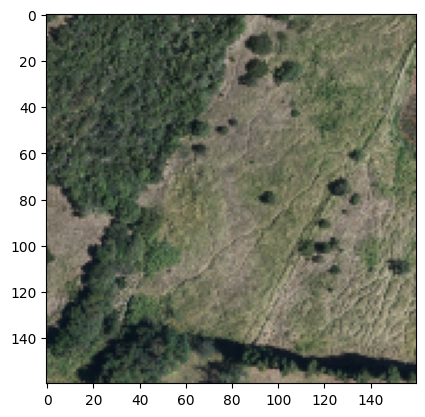

In [7]:
plt.imshow(img.permute(1, 2, 0).cpu().numpy())

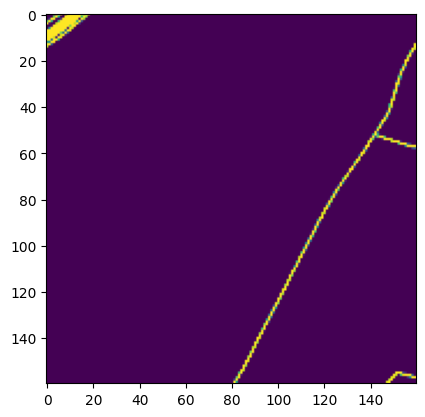

In [8]:
plt.imshow(mask.permute(1,2,0))

In [9]:
# Función para calcular el puntaje F1 para la clase "lindero"
def calcular_f1_lindero(predicciones, mascaras):
    """Calcula el puntaje F1 para la clase 'lindero'.

    Args:
        predicciones: Tensor de predicciones del modelo.
        mascaras: Tensor de máscaras verdaderas.

    Returns:
        Puntaje F1 para la clase 'lindero'.
    """


    # Convierte las predicciones a etiquetas binarias (0 o 1)
    predicciones_binarias = (predicciones > 0.5).astype(int)

    # Calcula el puntaje F1 usando sklearn.metrics.f1_score
    f1 = f1_score(mascaras.flatten(), predicciones_binarias.flatten())

    return f1

# Model

In [10]:
model = smp.FPN(encoder_name='resnet152', encoder_weights='imagenet', in_channels=3, classes=1)
model = model.to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 230M/230M [00:00<00:00, 422MB/s]


In [11]:
model

FPN(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

# Training

In [12]:
mejor_f1_lindero = 0
epochs = 7
all_predictions = []
all_masks = []
memory_predictions_last_epoch = []  # Store predictions only for the last epoch
memory_masks_last_epoch = []  # Store masks only for the last epoch

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_cm = np.zeros((2, 2), dtype=np.int64)
    train_accuracy = 0.0
    train_f1_boundary = 0.0
    train_f1_no_boundary = 0.0
    train_kappa = 0.0

    for images,mask in train_loader:
        images, mask = images.to(device), mask.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, mask)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        output_binary = (torch.sigmoid(output) > 0.5).cpu().numpy().astype(np.uint8)
        mask_binary = mask.cpu().numpy().astype(np.uint8)
        train_cm += confusion_matrix(mask_binary.flatten(), output_binary.flatten())
        train_accuracy += accuracy_score(mask_binary.flatten(), output_binary.flatten())
        train_f1_boundary += f1_score(mask_binary.flatten(), output_binary.flatten(), pos_label=1)
        train_f1_no_boundary += f1_score(mask_binary.flatten(), output_binary.flatten(), pos_label=0)
        train_kappa += cohen_kappa_score(mask_binary.flatten(), output_binary.flatten())

    torch.cuda.empty_cache()

    model.eval()
    val_loss = 0.0
    # Métricas para la validación
    val_cm = np.zeros((2, 2), dtype=np.int64)  # Inicializar matriz de confusión
    val_accuracy = 0.0
    val_f1_boundary = 0.0
    val_f1_no_boundary = 0.0
    val_kappa = 0.0

    with  torch.no_grad():
        for images, mask in val_loader:
            images, mask = images.to(device), mask.to(device)
            output = model(images)
            loss = criterion(output, mask)
            val_loss += loss.item()

            output_binary = (torch.sigmoid(output) > 0.5).cpu().numpy().astype(np.uint8)
            all_predictions.extend(output_binary)
            mask_binary = mask.cpu().numpy().astype(np.uint8)
            all_masks.extend(mask_binary) # Guardar las máscaras originales para imprimir
            val_cm += confusion_matrix(mask_binary.flatten(), output_binary.flatten())
            val_accuracy += accuracy_score(mask_binary.flatten(), output_binary.flatten())
            val_f1_boundary += f1_score(mask_binary.flatten(), output_binary.flatten(), pos_label=1)
            val_f1_no_boundary += f1_score(mask_binary.flatten(), output_binary.flatten(), pos_label=0)
            val_kappa += cohen_kappa_score(mask_binary.flatten(), output_binary.flatten())

            # Guardar predicciones y máscaras solo en la última época
            if epoch == epochs - 1:
                output_binary = (torch.sigmoid(output) > 0.5).cpu().numpy().astype(np.uint8)
                mask_binary = mask.cpu().numpy().astype(np.uint8)

                for j in range(output_binary.shape[0]):
                    memory_predictions_last_epoch.append(output_binary[j])
                    memory_masks_last_epoch.append(mask_binary[j])

    train_loss = train_loss / len(train_loader)
    train_accuracy = train_accuracy / len(train_loader)
    train_f1_boundary = train_f1_boundary / len(train_loader)
    train_f1_no_boundary = train_f1_no_boundary / len(train_loader)
    train_kappa = train_kappa / len(train_loader)

    val_loss = val_loss / len(val_loader)
    val_accuracy = val_accuracy / len(val_loader)
    val_f1_boundary = val_f1_boundary / len(val_loader)
    val_f1_no_boundary = val_f1_no_boundary / len(val_loader)
    val_kappa = val_kappa / len(val_loader)

        # Calcula el puntaje F1 para la clase "lindero"
    f1_lindero = calcular_f1_lindero(output_binary, mask_binary)

        # Guarda el modelo si el puntaje F1 es mayor que el mejor hasta ahora
    if f1_lindero > mejor_f1_lindero:
        mejor_f1_lindero = f1_lindero
        torch.save(model.state_dict(), 'FPN115.pth')
        print(f"Model saved at epoch {epoch + 1} with f1 socore boundary: {mejor_f1_lindero:.4f}")

    print(f"Epoch [{epoch + 1}/{epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Train F1 Boundary: {train_f1_boundary:.4f}, Train F1 No Boundary: {train_f1_no_boundary:.4f}, Train Kappa: {train_kappa:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}, Val F1 Boundary: {val_f1_boundary:.4f}, Val F1 No Boundary: {val_f1_no_boundary:.4f}, Val Kappa: {val_kappa:.4f}")
    print(f"Train Confusion Matrix:\n{train_cm}")
    print(f"Validation Confusion Matrix:\n{val_cm}")

# Mostrar todas las máscaras y predicciones para comparación solo de la ultima epoca
if memory_predictions_last_epoch and memory_masks_last_epoch:
    print("Mostrando máscaras y predicciones para comparación de la ultima época...")
    for i, (predicted_mask, mask_original) in enumerate(zip(memory_predictions_last_epoch, memory_masks_last_epoch)):
        plt.figure(figsize=(10, 5))

        # Mostrar máscara original
        plt.subplot(1, 2, 1)
        plt.imshow(mask_original.squeeze(), cmap='gray') # Squeeze to remove extra dimension
        plt.title(f"Máscara Original {i+1}")
        plt.axis('off')

        # Mostrar máscara predicha
        plt.subplot(1, 2, 2)
        plt.imshow(predicted_mask.squeeze(), cmap='gray') # Squeeze to remove extra dimension
        plt.title(f"Máscara Predicha {i+1}")
        plt.axis('off')

        plt.show()
else:
    print("No se encontraron imágenes para mostrar.")

Output hidden; open in https://colab.research.google.com to view.

# Inference

In [13]:
def infer_and_visualize(model, image_paths, device):
    for index, image_path in enumerate(image_paths): # Use enumerate to get index
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        original_image = image.copy()
        image = image.astype('float32') / 255.0

        h, w = image.shape[:2]
        new_h = (h // 32 + 1) * 32
        new_w = (w // 32 + 1) * 32

        image = cv2.copyMakeBorder(image, 0, new_h - h, 0, new_w - w, cv2.BORDER_CONSTANT, value=0)

        image_tensor = torch.tensor(image).permute(2, 0, 1).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image_tensor)
            output = torch.sigmoid(output).cpu().squeeze().numpy()
            output = (output > 0.5).astype(np.uint8)

            output = output[:original_image.shape[0], :original_image.shape[1]]

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 3, 1)
        plt.title(f'Imagen original {index + 1}') # Add index to title
        plt.imshow(original_image)

        plt.subplot(1, 3, 2)
        plt.title(f'Mascara {index + 1}') # Add index to title
        plt.imshow(output)

        plt.subplot(1, 3, 3)
        plt.title(f'Superposición {index + 1}') # Add index to title
        plt.imshow(original_image)
        plt.imshow(output, cmap='jet', alpha=0.5)

        plt.show()

In [14]:
model.load_state_dict(torch.load("/content/FPN115.pth"))

<ipython-input-14-0bdf283f77cc>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/FPN115.pth"))


<All keys matched successfully>

In [15]:
model.eval()

FPN(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

In [16]:
IMAGE_PATH = '/content/drive/MyDrive/DATA_LINDEROS/DATASET_Subachoque/Ortofoto_512x512/'
MASK_PATH = '/content/drive/MyDrive/DATA_LINDEROS/DATASET_Subachoque/Linderos_512x512/'

inference_image_numbers = ['10028','10029','10030','10031','10032','10033','10034','10035','10036','10037']
images_list = [os.path.join(IMAGE_PATH, f'SUBACHOQUE_ORTO_{number}.TIF') for number in inference_image_numbers]

infer_and_visualize(model, images_list, device)

Output hidden; open in https://colab.research.google.com to view.

In [17]:
import datetime

print(f"Hora de inicio: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Tu línea de código aquí
#resultado = 10 + 5

print(f"Hora de finalización: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Hora de inicio: 2025-01-26 08:30:36
Hora de finalización: 2025-01-26 08:30:36


In [18]:
from google.colab import files

files.download('FPN115.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
fin = time.time()
tiempo_total = fin - inicio

# Convertir segundos a horas
horas = tiempo_total / 3600  # 3600 segundos en una hora

print(f"Tiempo total de ejecución: {horas} horas")

Tiempo total de ejecución: 5.697869984176424 horas
